# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#!pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559707 sha256=15f094c3065f854c2e558cebe643d0e83736e78786bc95c6ae2fba738b1c993c
  Stored in directory: c:\users\c00778\appdata\local\pip\cache\wheels\72\ae\63\5d03cf6dfe5c0e9328fb73f8b30da1948a06b9cceaf2c68d2d
Successfully built citipy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

584

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
count = 0

city_id = []
name = []
lat = []
lon = []
max_temp = []
humidity = []
clud = []
wind_speed = []
country = []
date = []

for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city + '&units=imperial'
    print(f'Processing record {count} of set 1| {city}')
    count +=1
    try:
        city_weather_data = requests.get(query_url).json()
        city_id.append(city_weather_data['id'])
        name.append(city_weather_data['name'])
        lat.append(city_weather_data['coord']['lat'])
        lon.append(city_weather_data['coord']['lon'])
        max_temp.append(city_weather_data['main']['temp_max'])
        humidity.append(city_weather_data['main']['humidity'])
        clud.append(city_weather_data['clouds']['all'])
        wind_speed.append(city_weather_data['wind']['speed'])
        country.append(city_weather_data['sys']['country'])
        date.append(city_weather_data['dt'])
    except:
        continue
            

Processing record 0 of set 1| adrar
Processing record 1 of set 1| hermanus
Processing record 2 of set 1| tsihombe
Processing record 3 of set 1| busselton
Processing record 4 of set 1| jamestown
Processing record 5 of set 1| barentsburg
Processing record 6 of set 1| atasu
Processing record 7 of set 1| deputatskiy
Processing record 8 of set 1| saskylakh
Processing record 9 of set 1| hay river
Processing record 10 of set 1| albany
Processing record 11 of set 1| rikitea
Processing record 12 of set 1| nizhneyansk
Processing record 13 of set 1| mataura
Processing record 14 of set 1| quatre cocos
Processing record 15 of set 1| iqaluit
Processing record 16 of set 1| souillac
Processing record 17 of set 1| guayaramerin
Processing record 18 of set 1| punta arenas
Processing record 19 of set 1| honiara
Processing record 20 of set 1| taolanaro
Processing record 21 of set 1| yelizovo
Processing record 22 of set 1| manati
Processing record 23 of set 1| bredasdorp
Processing record 24 of set 1| ushua

Processing record 202 of set 1| maues
Processing record 203 of set 1| dingli
Processing record 204 of set 1| atambua
Processing record 205 of set 1| pisco
Processing record 206 of set 1| loreto
Processing record 207 of set 1| koumac
Processing record 208 of set 1| bohonye
Processing record 209 of set 1| faanui
Processing record 210 of set 1| pahrump
Processing record 211 of set 1| centralia
Processing record 212 of set 1| marsala
Processing record 213 of set 1| grindavik
Processing record 214 of set 1| kahului
Processing record 215 of set 1| rawson
Processing record 216 of set 1| liepaja
Processing record 217 of set 1| korla
Processing record 218 of set 1| jabiru
Processing record 219 of set 1| the valley
Processing record 220 of set 1| ipixuna
Processing record 221 of set 1| saldanha
Processing record 222 of set 1| stillwater
Processing record 223 of set 1| bababe
Processing record 224 of set 1| minab
Processing record 225 of set 1| san pedro
Processing record 226 of set 1| tanacu
Pro

Processing record 404 of set 1| kushima
Processing record 405 of set 1| darnah
Processing record 406 of set 1| cap malheureux
Processing record 407 of set 1| mahibadhoo
Processing record 408 of set 1| vredendal
Processing record 409 of set 1| broken hill
Processing record 410 of set 1| sept-iles
Processing record 411 of set 1| zhicheng
Processing record 412 of set 1| talah
Processing record 413 of set 1| luderitz
Processing record 414 of set 1| tiznit
Processing record 415 of set 1| agadez
Processing record 416 of set 1| bethel
Processing record 417 of set 1| tokur
Processing record 418 of set 1| baheri
Processing record 419 of set 1| eisenberg
Processing record 420 of set 1| tuggurt
Processing record 421 of set 1| pangnirtung
Processing record 422 of set 1| gosainganj
Processing record 423 of set 1| dukat
Processing record 424 of set 1| nguru
Processing record 425 of set 1| grande prairie
Processing record 426 of set 1| lavrentiya
Processing record 427 of set 1| santo tomas
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_weather_df = pd.DataFrame({'city name':name,
                                'country':country,
                                'date':date,
                                'lon':lon,
                                'lat':lat,
                                'max temp':max_temp,
                                'humidity':humidity,
                                'cloudiness':clud,
                                'wind speed':wind_speed})
 
len(city_weather_df)

530

In [7]:
city_weather_df.to_csv('city_weather_info.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
city_stats = city_weather_df.describe()
city_stats.to_csv('city_stats.csv')

In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [12]:
x_label = 'Latitude'


def scatter_plot (x,y,x_label,y_label,title,color):
    plt.scatter(x,y,c=color,edgecolor='black')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    plt.savefig(f'{title}.png')
    plt.show()


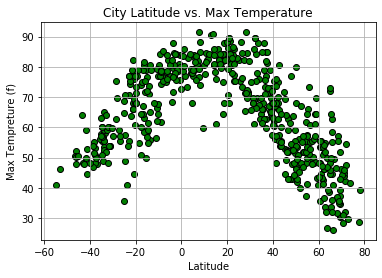

In [13]:
scatter_plot(lat,
             max_temp,
             x_label,
             'Max Tempreture (f)',
             'City Latitude vs. Max Temperature',
             'g')

The above scatter graph displays the relationship between a city's location in reltion to the equator and its temperature. It is apparent that as cities get closer to the equator their maximum temperature increases. 0 indicates the equator. 

## Latitude vs. Humidity Plot

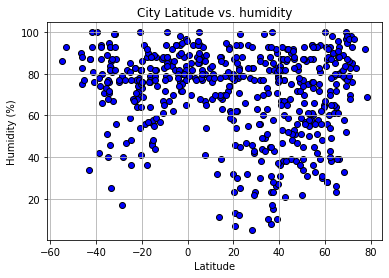

In [14]:
scatter_plot(lat,
             humidity,
             x_label,
             'Humidity (%)',
             'City Latitude vs. humidity',
             'b')

This above scatter graph displays the relationship between a cities humidity and its location in relation to the equater (0 indicates the equator). It seems that cities that are north of the equtor have higher humidity. 

## Latitude vs. Cloudiness Plot

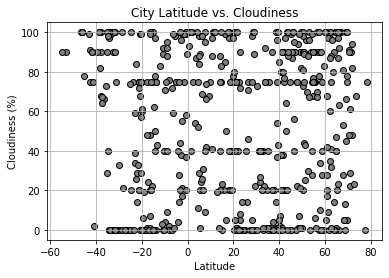

In [15]:
scatter_plot(lat,
             clud,
             x_label,
             'Cloudiness (%)',
             'City Latitude vs. Cloudiness',
             'gray')

## Latitude vs. Wind Speed Plot

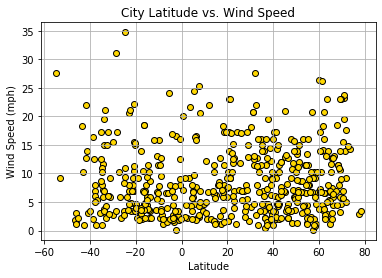

In [16]:
scatter_plot(lat,
             wind_speed,
             x_label,
             'Wind Speed (mph)',
             'City Latitude vs. Wind Speed',
             'gold')

## Linear Regression

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots

In [19]:
# Create Northern and Southern Hemisphere DataFrames
northern_cities_filter = city_weather_df['lat']>=0 
northern_cities=city_weather_df[northern_cities_filter]
northern_cities.to_csv('northern_cities.csv')

In [20]:
southern_cities_filter = city_weather_df['lat'] < 0
southern_cities = city_weather_df[southern_cities_filter]
southern_cities.to_csv('southern_cities')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [26]:
nx = northern_cities['lat']
sx = southern_cities['lat']

In [27]:
def cities_scatter(x,y,x_label,y_label,title):
    plt.scatter(x,y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    line = slope*x+intercept
    plt.plot(x, line, 'r', label='fitted line')
    plt.savefig(f'{title}.png')
    plt.show()

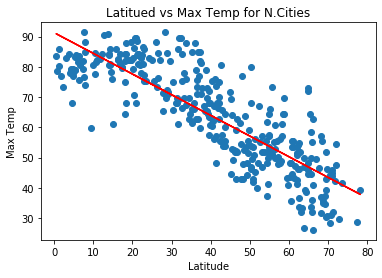

In [28]:
y = northern_cities['max temp']
y_label = 'Max Temp'
title = 'Latitued vs Max Temp for N.Cities'
cities_scatter(nx,y,x_label,y_label,title)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

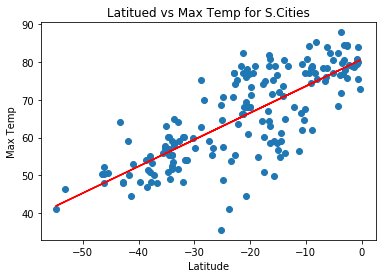

In [29]:
y = southern_cities['max temp']
y_label = 'Max Temp'
title = 'Latitued vs Max Temp for S.Cities'
cities_scatter(sx,y,x_label,y_label,title)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

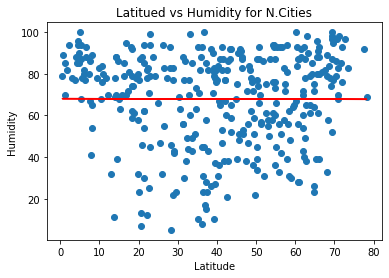

In [30]:
y = northern_cities['humidity']
y_label = 'Humidity'
title = 'Latitued vs Humidity for N.Cities'
cities_scatter(nx,y,x_label,y_label,title)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

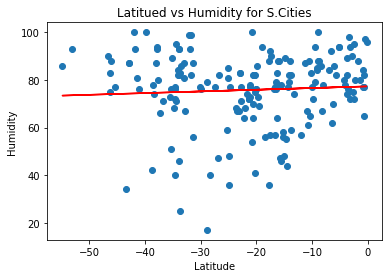

In [31]:
y = southern_cities['humidity']
y_label = 'Humidity'
title = 'Latitued vs Humidity for S.Cities'
cities_scatter(sx,y,x_label,y_label,title)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

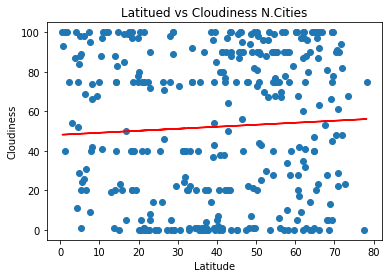

In [32]:
y = northern_cities['cloudiness']
y_label = 'Cloudiness'
title = 'Latitued vs Cloudiness N.Cities'
cities_scatter(nx,y,x_label,y_label,title)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

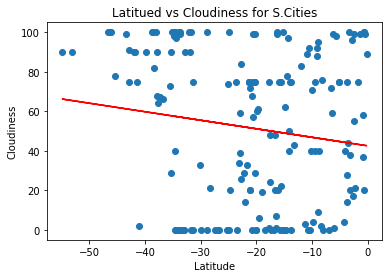

In [33]:
y = southern_cities['cloudiness']
y_label = 'Cloudiness'
title = 'Latitued vs Cloudiness for S.Cities'
cities_scatter(sx,y,x_label,y_label,title)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

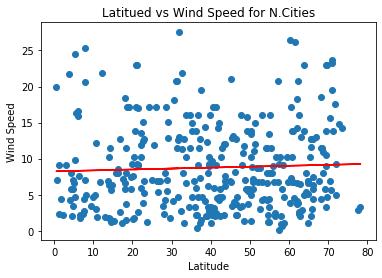

In [34]:
y = northern_cities['wind speed']
y_label = 'Wind Speed'
title = 'Latitued vs Wind Speed for N.Cities'
cities_scatter(nx,y,x_label,y_label,title)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

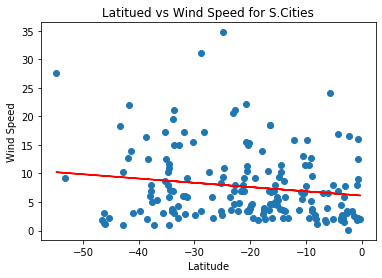

In [35]:
y = southern_cities['wind speed']
y_label = 'Wind Speed'
title = 'Latitued vs Wind Speed for S.Cities'
cities_scatter(sx,y,x_label,y_label,title)